# Práctica de Reconocimiento de Entidades Nombradas (NER)

Un modelo para español y nerlandes ==> comparar features

feature_functions ==> manualment functions

Codificacions: BIO, BIOW(BIOS), IO (criteri de decodificació?), BIOE, BIOES, BIOE+ (diferent Os, O before person)

MÉS ETIQUETA (MÉS PROBABILITATS DE DISTRIBUCIÓ) ==> MENYS MOSTRA PER ETIQUETA (PITJOR)       PUNT EQUILIBRI??? => COMENTAR

Anàlisis ==> com afceta els features y les codificacions

Gazetters ==> LINE/LIME

get_features(O, t) == f(xt, xt-1, t, O)

Afegir context al feature_function = token anterior o posterior (WORD_-1_at), (WORD_-2_works)

MODIFICAR LA FUNCIÓ FONT =====> ANALITZAR DES DE 0 (també traient els features originals)

PASAR COM A PARÀMETRE DE TOKENS (TOKEN, POS).

1. BIO ==> IO (treure B), BIOS (entre dos O = S)

2. Descodificar etiquetas a entitats per AVALUACIÓ (sets reals intersecció sets predicció), millor sets(inici, final, classe)

In [ ]:
!pip install python-crfsuite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import nltk
import svgling
nltk.download('maxent_ne_chunker')

nltk.download('punkt') # Tokenitzador
nltk.download('averaged_perceptron_tagger') # Etiquetador POS
nltk.download('maxent_ne_chunker') # Etiquetador Entitats Anomenades
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/taya/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /home/taya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/taya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/taya/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/taya/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
sentence = "Mark Pedersen is working at Google since 1994."
res = nltk.ne_chunk(
        nltk.pos_tag(
          nltk.word_tokenize(sentence)))

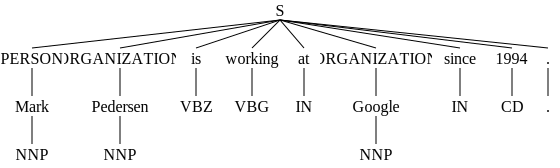

In [7]:
svgling.draw_tree(res)

In [8]:
print(res)

(S
  (PERSON Mark/NNP)
  (ORGANIZATION Pedersen/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Google/NNP)
  since/IN
  1994/CD
  ./.)


In [9]:
nltk.download('treebank')
train = nltk.corpus.treebank.tagged_sents()[:3000]

[nltk_data] Downloading package treebank to /home/taya/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [10]:
train

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

plh : feature engineering (noves variables), mètriques segons les entitats (codificació, descodificació, avaluacions), postags, lemas, context (word-1 o +1), llistas de paraules(line), optimització de codi (classe), significance dels features (incluides les de nltk).

OPCIONAL : Reconèixer entitats nomenades de l'àmbit mèdic (síntomes, medicaments...) (amb parser de dependències)

## class ##

class FeatFunc:
    def __init__(self, use_pref, use_suf, ...):
        self.usepref = use_pref

    def __call__(self, tokens, idx) -> List[str]:
        feats = []
        if self.usepref:
            feat = f"pref._{tokens[idx][:3]}"
            feats.append(feat)
    
    def guardar_altres...

feat_func = FeatFunc(use_pref = True, user_suf = False) ## Instància de 
(RFtagger(feat_func = get_feats))
feat_func(...) ## CRIDA A __CALL__ ==> CREA O AFAGEIX FEATURES